In [17]:
import pandas as pd

data = pd.read_csv('/Users/apple/Desktop/NLP Run/Datasets - Intel/Mall_Customers.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
data.dtypes.value_counts()

int64     4
object    1
Name: count, dtype: int64

In [11]:
data_input = data[['Annual Income (k$)','Spending Score (1-100)']]
data_input.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

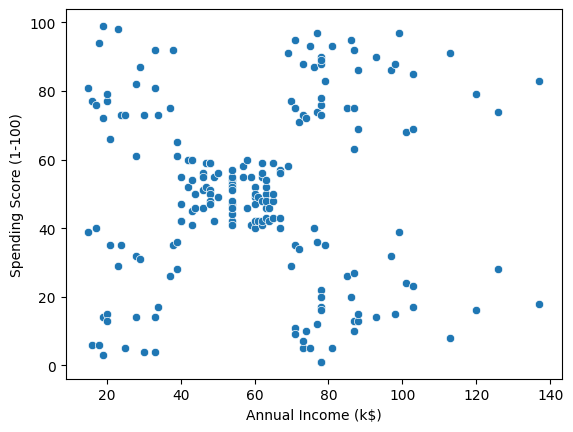

In [12]:
import seaborn as sns
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',data = data_input)

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,n_init=10)
km.fit(data_input)
y_pred = km.predict(data_input)
data_input['Label'] = y_pred
data_input.head()

/var/folders/ls/4pjb6hx17mqcqqp9c9jz4l3w0000gn/T/ipykernel_1203/1636069173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input['Label'] = y_pred


,Annual Income (k$),Spending Score (1-100),Label
0,15,39,1
1,15,81,2
2,16,6,1
3,16,77,2
4,17,40,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

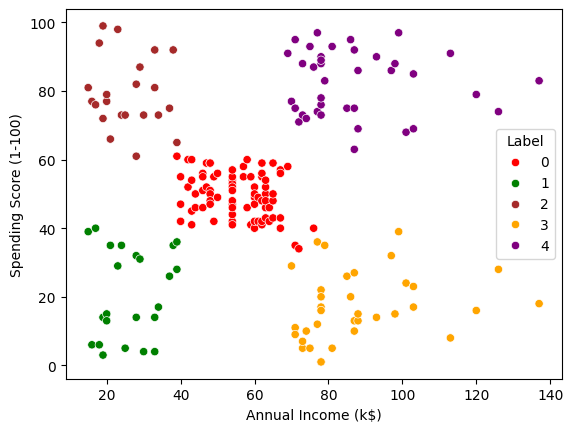

In [14]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',data = data_input,hue='Label',palette = ['red','green','brown','orange','purple'])

In [15]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

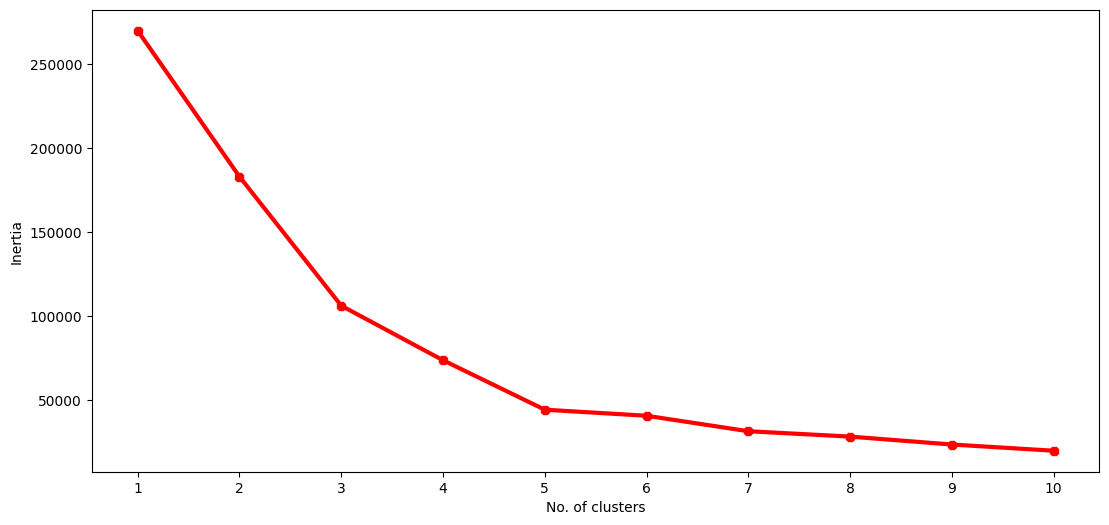

In [16]:
df1 = data[['Annual Income (k$)','Spending Score (1-100)']]
error = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.plot(range(1,11),error)
plt.plot(range(1,11),error,linewidth=3,color='red',marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')

import numpy as np
plt.xticks(np.linspace(1, 10, 10))
plt.show()